In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import pandas as pd
import matplotlib.pyplot as plt

# Prepare training and test data
training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())
train_data_loader = DataLoader(training_data, batch_size=64)
test_data_loader = DataLoader(test_data, batch_size=64)

In [3]:
# Define network
class FashionNetwork(nn.Module):
    def __init__(self):
        super(FashionNetwork, self).__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(1, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
 
    def forward(self, x):
        return self.conv_stack(x)

In [4]:
def train_loop(data_loader, model, loss_function, optimizer):
    mean_loss, n_correct = 0, 0

    for batch, (data, labels) in enumerate(data_loader):
        # Feed data through network and compute loss.
        prediction = model(data)
        loss = loss_function(prediction, labels)
 
        # Zero gradients.
        optimizer.zero_grad()
 
        # Perform backpropagation and accumulate gradients.
        loss.backward()
 
        # Update network parameters.
        optimizer.step()

        mean_loss += loss.detach().item()
        n_correct += (prediction.argmax(1) == labels).type(torch.float).sum().item()
    
    return n_correct / len(data_loader.dataset), mean_loss / len(data_loader)

def test_loop(data_loader, model, loss_function):
    mean_loss, n_correct = 0, 0
 
    with torch.no_grad():
        for data, labels in data_loader:
            # Feed data through network and accumulate loss.
            prediction = model(data)
            
            mean_loss += loss_function(prediction, labels).item()
            n_correct += (prediction.argmax(1) == labels).type(torch.float).sum().item()
 
    return n_correct / len(data_loader.dataset), mean_loss / len(data_loader)

### Optimizer: SGD
 Epoch 01: 	Train Accuracy: 10.00%, Train Loss: 2.296,	Test Accuracy: 10.00%, Test Loss: 2.291
 Epoch 02: 	Train Accuracy: 12.22%, Train Loss: 2.284,	Test Accuracy: 16.52%, Test Loss: 2.277
 Epoch 03: 	Train Accuracy: 20.50%, Train Loss: 2.266,	Test Accuracy: 20.25%, Test Loss: 2.254
 Epoch 04: 	Train Accuracy: 23.11%, Train Loss: 2.234,	Test Accuracy: 24.68%, Test Loss: 2.209
 Epoch 05: 	Train Accuracy: 29.09%, Train Loss: 2.164,	Test Accuracy: 32.73%, Test Loss: 2.102
 Epoch 06: 	Train Accuracy: 44.66%, Train Loss: 1.978,	Test Accuracy: 49.42%, Test Loss: 1.81
 Epoch 07: 	Train Accuracy: 53.79%, Train Loss: 1.586,	Test Accuracy: 57.41%, Test Loss: 1.382
 Epoch 08: 	Train Accuracy: 59.81%, Train Loss: 1.241,	Test Accuracy: 60.89%, Test Loss: 1.142
 Epoch 09: 	Train Accuracy: 62.33%, Train Loss: 1.071,	Test Accuracy: 62.48%, Test Loss: 1.033
 Epoch 10: 	Train Accuracy: 64.08%, Train Loss: 0.9888,	Test Accuracy: 64.05%, Test Loss: 0.9751
 Epoch 11: 	Train Accuracy: 65

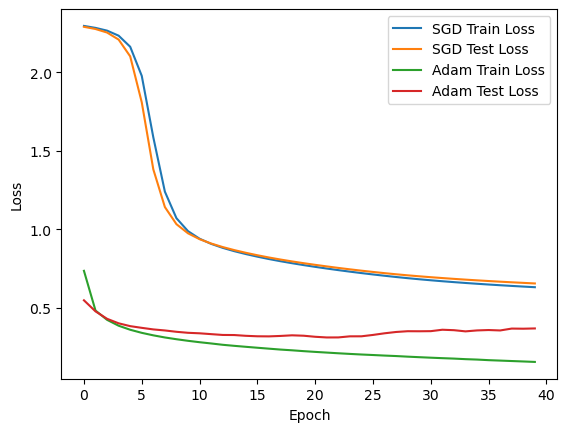

In [7]:
model = FashionNetwork()
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
n_epochs = 40
results = {}

optimizers = [('SGD', torch.optim.SGD), ('Adam', torch.optim.Adam)]

for (optimizer_name, optimizer) in optimizers:
    model = FashionNetwork()
    print('### Optimizer:', optimizer_name)
    optimizer = optimizer(model.parameters(), lr=learning_rate)

    results[f'{optimizer_name} Train Loss'] = []
    results[f'{optimizer_name} Test Loss']  = []

    for epoch in range(n_epochs):
        print(f' Epoch {epoch+1:02}: ', end='\t')
        train_acc, train_loss = train_loop(train_data_loader, model, loss_fn, optimizer)
        print(f'Train Accuracy: {train_acc:.2%},', f'Train Loss: {train_loss:.4}', end=',\t')

        test_acc, test_loss = test_loop(test_data_loader, model, loss_fn)
        print(f'Test Accuracy: {test_acc:.2%},', f'Test Loss: {test_loss:.4}')

        results[f'{optimizer_name} Train Loss'].append(train_loss)
        results[f'{optimizer_name} Test Loss'].append(test_loss)

pd.DataFrame(results).plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Batch Size: 16
 Epoch 01: 	Train Accuracy: 79.58%, Train Loss: 0.5534,	Test Accuracy: 84.01%, Test Loss: 0.4328
 Epoch 02: 	Train Accuracy: 86.45%, Train Loss: 0.3713,	Test Accuracy: 86.73%, Test Loss: 0.3643
 Epoch 03: 	Train Accuracy: 88.17%, Train Loss: 0.3216,	Test Accuracy: 87.88%, Test Loss: 0.3393
 Epoch 04: 	Train Accuracy: 89.14%, Train Loss: 0.2927,	Test Accuracy: 88.02%, Test Loss: 0.3361
 Epoch 05: 	Train Accuracy: 89.84%, Train Loss: 0.2712,	Test Accuracy: 88.01%, Test Loss: 0.336
 Epoch 06: 	Train Accuracy: 90.46%, Train Loss: 0.2536,	Test Accuracy: 88.50%, Test Loss: 0.3248
 Epoch 07: 	Train Accuracy: 91.10%, Train Loss: 0.2386,	Test Accuracy: 88.16%, Test Loss: 0.3328
 Epoch 08: 	Train Accuracy: 91.65%, Train Loss: 0.226,	Test Accuracy: 88.66%, Test Loss: 0.3288
 Epoch 09: 	Train Accuracy: 92.06%, Train Loss: 0.2143,	Test Accuracy: 88.49%, Test Loss: 0.34
 Epoch 10: 	Train Accuracy: 92.40%, Train Loss: 0.2061,	Test Accuracy: 88.58%, Test Loss: 0.3382
 Epoch 11: 	Tra

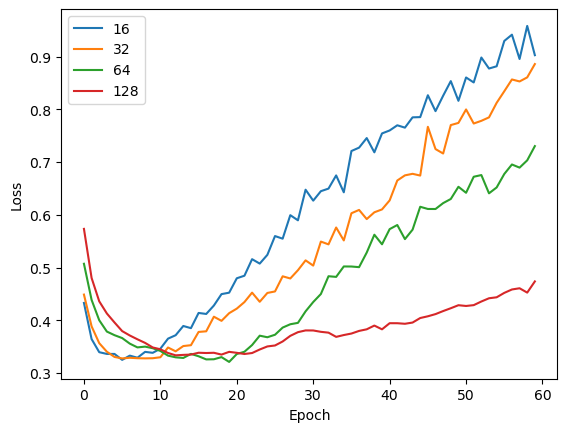

In [6]:
model = FashionNetwork()
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
n_epochs = 60
results = {}

batch_sizes = [16, 32, 64, 128]


for batch_size in batch_sizes:
    model = FashionNetwork()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    print('### Batch Size:', batch_size)
    train_data_loader = DataLoader(training_data, batch_size=batch_size)
    test_data_loader = DataLoader(test_data, batch_size=batch_size)

    results[batch_size]  = []

    for epoch in range(n_epochs):
        print(f' Epoch {epoch+1:02}: ', end='\t')
        train_acc, train_loss = train_loop(train_data_loader, model, loss_fn, optimizer)
        print(f'Train Accuracy: {train_acc:.2%},', f'Train Loss: {train_loss:.4}', end=',\t')

        test_acc, test_loss = test_loop(test_data_loader, model, loss_fn)
        print(f'Test Accuracy: {test_acc:.2%},', f'Test Loss: {test_loss:.4}')

        results[batch_size].append(test_loss)

pd.DataFrame(results).plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Differences:

- Small batch sizes -> fast overfitting
- Big batch sizes -> better in the 'end' (worse at start)